# Do we have bad players or bad are we unlucky
## IAITB Slowpitch performance, Catalyst Tournament StudyCase

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df = pd.read_excel('/content/Catalyst Dominates Jakarta Initial Plan (1).xlsx')

In [3]:
df.head()

,Name,#,Team,GP,PA,AB,H,1B,2B,3B,...,R,RBI,BB,SF,INT\n/OBS,K/KS\n/KF,AVG,SLUG,OBP,AVG.1
0,Angga Adhitya Fritz,88,Abnon,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.000
1,Devanka Indra Saskia,89,Abnon,2,5,2,0,0,0,0,...,1,1,3,0,0,1,0.0,0.0,0.6,0.200
2,Farah Dwi,2,Abnon,3,7,7,0,0,0,0,...,0,0,0,0,0,2,0.0,0.0,0.0,0.000
3,Geraldo Cynthia,8,Abnon,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.000
4,Ikra Wiratama,87,Abnon,2,5,5,5,3,2,0,...,4,0,0,0,0,0,1.0,1.4,1.0,1.133


# Check for missing values

In [4]:
df.columns[df.isna().any()].tolist()

[]

# Data Summary

In [5]:
df.describe()

,#,GP,PA,AB,H,1B,2B,3B,HR,R,RBI,BB,SF,INT\n/OBS,K/KS\n/KF,AVG,SLUG,OBP,AVG.1
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.0,339.000000,339.000000,339.000000,339.000000,339.000000
mean,52.150442,2.371681,5.598820,4.991150,2.271386,1.528024,0.513274,0.117994,0.112094,1.870206,1.572271,0.557522,0.050147,0.0,0.401180,0.373625,0.533726,0.436310,0.447897
std,112.291665,0.965635,2.846902,2.709273,2.084766,1.470100,0.840348,0.366013,0.454238,1.781138,2.164110,0.764656,0.218572,0.0,0.628324,0.294391,0.505360,0.270709,0.340478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.500000,2.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.250000,0.167000
50%,25.000000,3.000000,6.000000,5.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.375000,0.500000,0.500000,0.433000
75%,56.500000,3.000000,8.000000,7.000000,4.000000,2.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000,0.000000,0.0,1.000000,0.571000,0.800000,0.625000,0.681000
max,999.000000,4.000000,11.000000,11.000000,8.000000,7.000000,4.000000,2.000000,4.000000,8.000000,17.000000,4.000000,1.000000,0.0,3.000000,1.000000,2.500000,1.000000,1.500000


# Team Average, IAITB performance are above or below standard deviation

In [6]:
# First, clean column names to make them easier to work with
df.columns = df.columns.str.strip().str.replace('\n', '/').str.replace(' ', '_')

# Filter IAITB team
df_iaitb = df[df['Team'] == 'IAITB']
df_others = df[df['Team'] != 'IAITB']

In [7]:
# Update column name in the list
columns_to_sum_corrected = ['GP', 'PA', 'AB', 'H', '1B', '2B', '3B', 'HR', 'R', 'RBI', 'BB', 'SF', 'K/KS//KF']

# Calculate team-wide averages per player (mean of individual stats)
team_averages = pd.DataFrame({
    'Metric': columns_to_sum_corrected,
    'IAITB_Avg': df_iaitb[columns_to_sum_corrected].mean().values,
    'Other_Teams_Avg': df_others[columns_to_sum_corrected].mean().values
})

In [8]:
import numpy as np
from scipy import stats

# Calculate mean and standard error of the mean for other teams
other_means = df_others[columns_to_sum_corrected].mean()
other_sems = df_others[columns_to_sum_corrected].sem()

# Confidence level (e.g., 95%)
confidence = 0.95
n_other = len(df_others)

# Calculate margin of error using t-distribution
t_value = stats.t.ppf((1 + confidence) / 2., n_other - 1)
margin_of_error = t_value * other_sems

# Construct confidence intervals
ci_lower = other_means - margin_of_error
ci_upper = other_means + margin_of_error

# Combine with IAITB averages
interval_comparison = pd.DataFrame({
    'Metric': columns_to_sum_corrected,
    'IAITB_Avg': df_iaitb[columns_to_sum_corrected].mean().values,
    'Other_Avg': other_means.values,
    'CI_Lower': ci_lower.values,
    'CI_Upper': ci_upper.values
})

# Add flag whether IAITB is below, within, or above the confidence interval
def compare_with_interval(row):
    if row['IAITB_Avg'] < row['CI_Lower']:
        return 'Below'
    elif row['IAITB_Avg'] > row['CI_Upper']:
        return 'Above'
    else:
        return 'Within'

interval_comparison['Position_vs_CI'] = interval_comparison.apply(compare_with_interval, axis=1)

In [9]:
interval_comparison

,Metric,IAITB_Avg,Other_Avg,CI_Lower,CI_Upper,Position_vs_CI
0,GP,2.277778,2.376947,2.270732,2.483162,Within
1,PA,5.277778,5.616822,5.303343,5.930302,Below
2,AB,4.500000,5.018692,4.719228,5.318156,Below
3,H,2.111111,2.280374,2.049645,2.511102,Within
4,1B,1.222222,1.545171,1.381882,1.708461,Below
5,2B,0.777778,0.498442,0.407341,0.589543,Above
6,3B,0.055556,0.121495,0.080656,0.162335,Below
7,HR,0.055556,0.115265,0.064372,0.166158,Below
8,R,2.666667,1.825545,1.630051,2.021040,Above
9,RBI,2.000000,1.548287,1.311693,1.784880,Above


# IAITB AVG, OBP, and SLUG performance below or above standard deviation

In [10]:
# First, calculate team totals needed for weighted stats
def calculate_weighted_metrics(df_team):
    H = df_team['H'].sum()
    AB = df_team['AB'].sum()
    BB = df_team['BB'].sum()
    SF = df_team['SF'].sum()
    PA = df_team['PA'].sum()
    _1B = df_team['1B'].sum()
    _2B = df_team['2B'].sum()
    _3B = df_team['3B'].sum()
    HR = df_team['HR'].sum()
    TB = _1B + 2*_2B + 3*_3B + 4*HR

    avg = H / AB if AB > 0 else 0
    obp = (H + BB + SF) / PA if PA > 0 else 0
    slg = TB / AB if AB > 0 else 0
    return avg, obp, slg

# Calculate IAITB weighted metrics
iaitb_avg, iaitb_obp, iaitb_slg = calculate_weighted_metrics(df_iaitb)

# For estimation interval of other teams, simulate sampling distribution using bootstrapping
np.random.seed(42)
n_bootstraps = 1000
boot_avgs, boot_obps, boot_slgs = [], [], []

for _ in range(n_bootstraps):
    sample = df_others.sample(frac=1, replace=True)
    avg, obp, slg = calculate_weighted_metrics(sample)
    boot_avgs.append(avg)
    boot_obps.append(obp)
    boot_slgs.append(slg)

# Compute 95% confidence intervals from bootstrap samples
ci_avg = np.percentile(boot_avgs, [2.5, 97.5])
ci_obp = np.percentile(boot_obps, [2.5, 97.5])
ci_slg = np.percentile(boot_slgs, [2.5, 97.5])

# Create comparison table
weighted_comparison = pd.DataFrame({
    'Metric': ['AVG', 'OBP', 'SLUG'],
    'IAITB_Value': [iaitb_avg, iaitb_obp, iaitb_slg],
    'CI_Lower': [ci_avg[0], ci_obp[0], ci_slg[0]],
    'CI_Upper': [ci_avg[1], ci_obp[1], ci_slg[1]]
})

# Flag IAITB performance
def evaluate_position(row):
    if row['IAITB_Value'] < row['CI_Lower']:
        return 'Below'
    elif row['IAITB_Value'] > row['CI_Upper']:
        return 'Above'
    else:
        return 'Within'

weighted_comparison['Position_vs_CI'] = weighted_comparison.apply(evaluate_position, axis=1)
weighted_comparison

,Metric,IAITB_Value,CI_Lower,CI_Upper,Position_vs_CI
0,AVG,0.469136,0.427582,0.483328,Within
1,OBP,0.547368,0.486127,0.539704,Above
2,SLUG,0.703704,0.614623,0.729106,Within


# Player ranking based on OPS

In [11]:
# Copy of original dataframe for player-level analysis
df_players = df.copy()

# Filter players with at least 4 PA and 3 AB (based on 25th percentile)
filtered_players = df_players[(df_players['PA'] >= 4) & (df_players['AB'] >= 3)].copy()

# Create OPS = OBP + SLUG
filtered_players['OPS'] = filtered_players['OBP'] + filtered_players['SLUG']

# Select relevant columns for ranking
ranking_cols = ['Name', 'Team', 'PA', 'AB', 'AVG', 'SLUG', 'OBP', 'OPS']

# Round for clarity
filtered_players[ranking_cols[4:]] = filtered_players[ranking_cols[4:]].round(3)

# Create sorted versions for each ranking metric
ranked_by_obp = filtered_players.sort_values(by='OBP', ascending=False).reset_index(drop=True)
ranked_by_slg = filtered_players.sort_values(by='SLUG', ascending=False).reset_index(drop=True)
ranked_by_ops = filtered_players.sort_values(by='OPS', ascending=False).reset_index(drop=True)

# Show top 15 by OPS as primary leaderboard
top_15_ops = ranked_by_ops.head(15)[ranking_cols]
top_15_ops

,Name,Team,PA,AB,AVG,SLUG,OBP,OPS
0,Eru Mahmud,Bat Attitude,5,4,1.000,2.500,1.000,3.500
1,Fiodias Baskara,Wild Hustle,6,6,1.000,2.500,1.000,3.500
2,Ryo Kokubo,Rubberducks,10,9,0.889,2.444,0.900,3.344
3,Ivent Kudmas,Supperbowl,8,8,0.875,2.375,0.875,3.250
4,Faldy Zulfikar,Los Animales,10,9,0.667,2.222,0.700,2.922
5,Hanif Rasya,AstroBima,4,4,0.750,2.000,0.750,2.750
6,Lucky Putra,Fourplay,7,7,1.000,1.714,1.000,2.714
7,M Anis Fikri,Wild Hustle,6,5,1.000,1.800,0.833,2.633
8,Panca Cahya Kusuma,Spar'o,7,7,0.857,1.714,0.857,2.571
9,Jarvi Wu,Catalyst Southwest,9,6,0.833,1.667,0.889,2.556


# Distribution of OPS

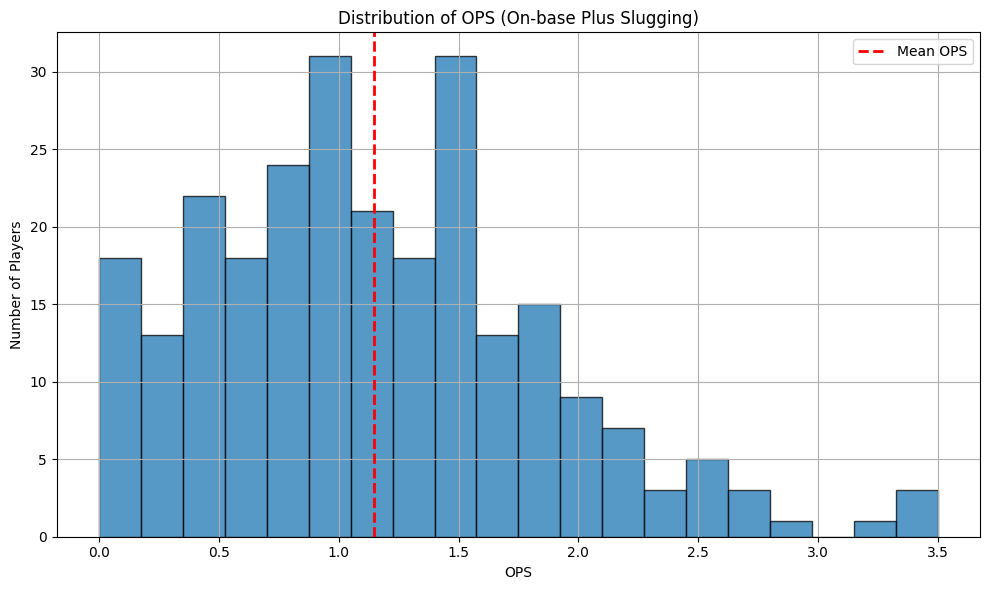

In [12]:
import matplotlib.pyplot as plt

# Plot histogram of OPS for all filtered players
plt.figure(figsize=(10, 6))
plt.hist(filtered_players['OPS'], bins=20, edgecolor='black', alpha=0.75)
plt.axvline(filtered_players['OPS'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean OPS')
plt.title('Distribution of OPS (On-base Plus Slugging)')
plt.xlabel('OPS')
plt.ylabel('Number of Players')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Where are IAITB Players across the Distribution

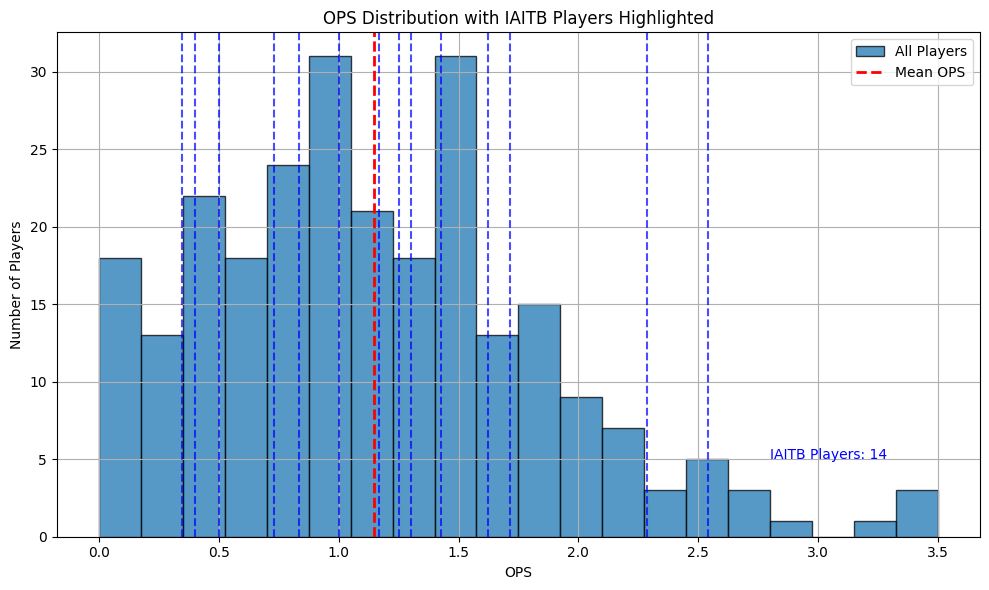

In [13]:
# Get IAITB players from filtered dataset
iaitb_players = filtered_players[filtered_players['Team'] == 'IAITB']

# Plot histogram again with IAITB markers
plt.figure(figsize=(10, 6))
plt.hist(filtered_players['OPS'], bins=20, edgecolor='black', alpha=0.75, label='All Players')
plt.axvline(filtered_players['OPS'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean OPS')

# Overlay IAITB player OPS
for _, row in iaitb_players.iterrows():
    plt.axvline(row['OPS'], color='blue', alpha=0.7, linestyle='--')

# Annotate the number of IAITB players shown
plt.text(2.8, 5, f"IAITB Players: {len(iaitb_players)}", color='blue', fontsize=10)

plt.title('OPS Distribution with IAITB Players Highlighted')
plt.xlabel('OPS')
plt.ylabel('Number of Players')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Rank IAITB Players based on OPS

In [14]:
# Select and display IAITB players with OPS, sorted from highest to lowest
iaitb_leaderboard = iaitb_players[['Name', 'PA', 'AB', 'AVG', 'SLUG', 'OBP', 'OPS']].sort_values(by='OPS', ascending=False).reset_index(drop=True)

# Round for readability
iaitb_leaderboard[['AVG', 'SLUG', 'OBP', 'OPS']] = iaitb_leaderboard[['AVG', 'SLUG', 'OBP', 'OPS']].round(3)

iaitb_leaderboard

,Name,PA,AB,AVG,SLUG,OBP,OPS
0,Muhammad Al Faruqi,8,6,0.833,1.667,0.875,2.542
1,Raynaldi Lalang,7,7,0.857,1.429,0.857,2.286
2,Muhammad Evan Prathama,7,6,0.833,1.000,0.714,1.714
3,Nur Rasyid Fadlurrahman,8,7,0.571,1.000,0.625,1.625
4,Yusuf Nugraha Andrian,8,5,0.400,0.800,0.625,1.425
5,Radhytia Ramadhan Rompas,6,5,0.400,0.800,0.500,1.300
6,Dave Sabathias,4,4,0.500,0.750,0.500,1.250
7,Muhammad Giffary Ivan,6,6,0.500,0.667,0.500,1.167
8,Kevin Sunjaya,4,4,0.500,0.500,0.500,1.000
9,Chaerannisa Clarissa M,4,3,0.333,0.333,0.500,0.833


# Which team has the most players with above mean OPS

In [19]:
# Remove the incorrectly labeled team entry
cleaned_players = filtered_players[filtered_players['Team'] != "Los Animales\nLos Animales"]

# Recalculate team-level OPS comparison
mean_ops_cleaned = cleaned_players['OPS'].mean()

grouped_cleaned = cleaned_players.groupby('Team')
cleaned_team_stats = []

for team, group in grouped_cleaned:
    total_players = len(group)
    above_mean = (group['OPS'] > mean_ops_cleaned).sum()
    percent_above = round(above_mean / total_players * 100, 1) if total_players > 0 else 0
    cleaned_team_stats.append({
        'Team': team,
        'Players Above Mean OPS': above_mean,
        'Total Qualified Players': total_players,
        'Percentage Above Mean': percent_above
    })

cleaned_team_ops_comparison = pd.DataFrame(cleaned_team_stats).sort_values(by='Percentage Above Mean', ascending=False)
cleaned_team_ops_comparison

,Team,Players Above Mean OPS,Total Qualified Players,Percentage Above Mean
7,Fourplay,10,14,71.4
19,Wild Hustle,10,15,66.7
17,The Imperials,6,10,60.0
1,After Hour,8,14,57.1
8,IAITB,8,14,57.1
3,Bat Attitude,6,11,54.5
13,Rubberducks,6,12,50.0
16,Supperbowl,6,13,46.2
6,Catalyst Southwest,6,13,46.2
12,Pejabat Gorillas,4,9,44.4


# Are IAITB players above or below OPS standard deviation

In [20]:
# Bootstrap confidence interval for mean OPS across all cleaned players
bootstrap_ops = []
n_boot = 1000
np.random.seed(42)

for _ in range(n_boot):
    sample = cleaned_players.sample(frac=1, replace=True)
    bootstrap_ops.append(sample['OPS'].mean())

# Calculate 95% confidence interval
ci_lower_ops = np.percentile(bootstrap_ops, 2.5)
ci_upper_ops = np.percentile(bootstrap_ops, 97.5)

# Check where each IAITB player's OPS falls
iaitb_eval = iaitb_players.copy()
iaitb_eval['CI_Lower'] = ci_lower_ops
iaitb_eval['CI_Upper'] = ci_upper_ops
iaitb_eval['Position_vs_CI'] = iaitb_eval['OPS'].apply(
    lambda x: 'Below' if x < ci_lower_ops else 'Above' if x > ci_upper_ops else 'Within'
)

# Select relevant columns
iaitb_ci_results = iaitb_eval[['Name', 'PA', 'AB', 'OPS', 'CI_Lower', 'CI_Upper', 'Position_vs_CI']].sort_values(by='OPS', ascending=False)

iaitb_ci_results

,Name,PA,AB,OPS,CI_Lower,CI_Upper,Position_vs_CI
143,Muhammad Al Faruqi,8,6,2.542,1.061965,1.229039,Above
148,Raynaldi Lalang,7,7,2.286,1.061965,1.229039,Above
144,Muhammad Evan Prathama,7,6,1.714,1.061965,1.229039,Above
146,Nur Rasyid Fadlurrahman,8,7,1.625,1.061965,1.229039,Above
152,Yusuf Nugraha Andrian,8,5,1.425,1.061965,1.229039,Above
147,Radhytia Ramadhan Rompas,6,5,1.300,1.061965,1.229039,Above
138,Dave Sabathias,4,4,1.250,1.061965,1.229039,Above
145,Muhammad Giffary Ivan,6,6,1.167,1.061965,1.229039,Within
140,Kevin Sunjaya,4,4,1.000,1.061965,1.229039,Below
137,Chaerannisa Clarissa M,4,3,0.833,1.061965,1.229039,Below


# Ranking of all IAITB Players

In [21]:
# Identify IAITB players with low appearance and at-bats (below thresholds used earlier)
low_participation_iaitb = df_players[
    (df_players['Team'] == 'IAITB') &
    ((df_players['PA'] < 4) | (df_players['AB'] < 3))
]

# Select relevant columns to inspect
low_participation_iaitb = low_participation_iaitb[['Name', 'PA', 'AB', 'AVG', 'SLUG', 'OBP']].sort_values(by='PA')

# Combine top IAITB players with low participation players
low_participation_iaitb = low_participation_iaitb.copy()
low_participation_iaitb['OPS'] = low_participation_iaitb['OBP'] + low_participation_iaitb['SLUG']
low_participation_iaitb['CI_Lower'] = ci_lower_ops
low_participation_iaitb['CI_Upper'] = ci_upper_ops
low_participation_iaitb['Position_vs_CI'] = low_participation_iaitb['OPS'].apply(
    lambda x: 'Below' if x < ci_lower_ops else 'Above' if x > ci_upper_ops else 'Within'
)

# Match the structure of the original CI results
low_participation_iaitb = low_participation_iaitb[['Name', 'PA', 'AB', 'OPS', 'CI_Lower', 'CI_Upper', 'Position_vs_CI']]

# Combine with previously filtered IAITB players
full_iaitb_ci_table = pd.concat([iaitb_ci_results, low_participation_iaitb], ignore_index=True).sort_values(by='OPS', ascending=False)
full_iaitb_ci_table

,Name,PA,AB,OPS,CI_Lower,CI_Upper,Position_vs_CI
0,Muhammad Al Faruqi,8,6,2.542,1.061965,1.229039,Above
1,Raynaldi Lalang,7,7,2.286,1.061965,1.229039,Above
2,Muhammad Evan Prathama,7,6,1.714,1.061965,1.229039,Above
3,Nur Rasyid Fadlurrahman,8,7,1.625,1.061965,1.229039,Above
4,Yusuf Nugraha Andrian,8,5,1.425,1.061965,1.229039,Above
5,Radhytia Ramadhan Rompas,6,5,1.300,1.061965,1.229039,Above
6,Dave Sabathias,4,4,1.250,1.061965,1.229039,Above
7,Muhammad Giffary Ivan,6,6,1.167,1.061965,1.229039,Within
8,Kevin Sunjaya,4,4,1.000,1.061965,1.229039,Below
9,Chaerannisa Clarissa M,4,3,0.833,1.061965,1.229039,Below


# Show winner performances as comparison

In [23]:
# Clean column names
df.columns = df.columns.str.strip().str.replace('\n', '/').str.replace(' ', '_')

# Recreate filtered dataset and calculated OPS
df['OPS'] = df['OBP'] + df['SLUG']
filtered_players = df[(df['PA'] >= 4) & (df['AB'] >= 3)].copy()
mean_ops_cleaned = filtered_players['OPS'].mean()

# Filter for Rubberducks players
rubberducks_players = filtered_players[filtered_players['Team'] == 'Rubberducks']

# Calculate team-level stats for Rubberducks
rubberducks_summary = {
    'Total Players': len(rubberducks_players),
    'Avg_PA': rubberducks_players['PA'].mean(),
    'Avg_AB': rubberducks_players['AB'].mean(),
    'Team_AVG': rubberducks_players['AVG'].mean(),
    'Team_OBP': rubberducks_players['OBP'].mean(),
    'Team_SLG': rubberducks_players['SLUG'].mean(),
    'Team_OPS': rubberducks_players['OPS'].mean(),
    'Players_Above_OPS_Mean': (rubberducks_players['OPS'] > mean_ops_cleaned).sum()
}

# Convert to DataFrame for display
rubberducks_summary_df = pd.DataFrame([rubberducks_summary])
rubberducks_summary_df

,Total Players,Avg_PA,Avg_AB,Team_AVG,Team_OBP,Team_SLG,Team_OPS,Players_Above_OPS_Mean
0,12,8.75,7.583333,0.548833,0.591333,0.829,1.420333,6


In [27]:
# Fix the syntax error by properly enclosing the generator expression
bootstrap_ops = [filtered_players['OPS'].sample(frac=1, replace=True).mean() for _ in range(1000)]

# Calculate 95% confidence interval
ci_lower_ops = np.percentile(bootstrap_ops, 2.5)
ci_upper_ops = np.percentile(bootstrap_ops, 97.5)

# Rebuild Rubberducks evaluation table
rubberducks_players = rubberducks_players.copy()
rubberducks_players['CI_Lower'] = ci_lower_ops
rubberducks_players['CI_Upper'] = ci_upper_ops
rubberducks_players['Position_vs_CI'] = rubberducks_players['OPS'].apply(
    lambda x: 'Below' if x < ci_lower_ops else 'Above' if x > ci_upper_ops else 'Within'
)

# Select and show relevant columns
rubberducks_ci_results = rubberducks_players[['Name', 'PA', 'AB', 'OPS', 'CI_Lower', 'CI_Upper', 'Position_vs_CI']].sort_values(by='OPS', ascending=False)
rubberducks_ci_results

,Name,PA,AB,OPS,CI_Lower,CI_Upper,Position_vs_CI
234,Ryo Kokubo,10,9,3.344,1.067658,1.236787,Above
231,M. Khemal Hafiz,10,9,2.144,1.067658,1.236787,Above
220,Andrie Pan Putra,9,8,2.139,1.067658,1.236787,Above
228,Kazuma Ishigami,10,10,1.900,1.067658,1.236787,Above
221,Arif Yusuf Subagja,10,8,1.575,1.067658,1.236787,Above
224,Henry Wijaya,11,11,1.363,1.067658,1.236787,Above
229,Laila Mutiara R.,9,6,1.056,1.067658,1.236787,Below
227,Ivan Wahyu,7,5,0.971,1.067658,1.236787,Below
223,Ellen Melorine,5,4,0.900,1.067658,1.236787,Below
230,M. Irvandi,8,6,0.833,1.067658,1.236787,Below


In [28]:
# Recalculate Rubberducks and IAITB average AB (At-Bats)
iaitb_ab = filtered_players[filtered_players['Team'] == 'IAITB']['AB']
rubberducks_ab = filtered_players[filtered_players['Team'] == 'Rubberducks']['AB']

# Create comparison DataFrame
ab_comparison = pd.DataFrame({
    'Team': ['IAITB', 'Rubberducks'],
    'Average AB': [iaitb_ab.mean(), rubberducks_ab.mean()],
    'Median AB': [iaitb_ab.median(), rubberducks_ab.median()],
    'Total AB': [iaitb_ab.sum(), rubberducks_ab.sum()],
    'Number of Players': [len(iaitb_ab), len(rubberducks_ab)]
})
ab_comparison

,Team,Average AB,Median AB,Total AB,Number of Players
0,IAITB,5.500000,5.5,77,14
1,Rubberducks,7.583333,8.0,91,12


In [33]:
# Group by team and calculate average AB per player
team_ab_stats = filtered_players.groupby('Team').agg(
    Average_AB=('AB', 'mean'),
    Median_AB=('AB', 'median'),
    Total_AB=('AB', 'sum'),
    Number_of_Players=('AB', 'count')
).reset_index()

# Sort by Average_AB in descending order
team_ab_stats_sorted = team_ab_stats.sort_values(by='Average_AB', ascending=False)
team_ab_stats_sorted.tail(20)

,Team,Average_AB,Median_AB,Total_AB,Number_of_Players
18,The Imperials,8.300000,8.5,83,10
14,Rubberducks,7.583333,8.0,91,12
9,Los Animales,7.000000,8.0,84,12
5,Catalyst Northeast,6.923077,8.0,90,13
19,We Slowpitch,6.923077,6.0,90,13
7,Fourplay,6.857143,7.5,96,14
16,Spar'o,6.692308,7.0,87,13
15,Sabar,6.642857,7.0,93,14
12,Netizen WTD,6.461538,7.0,84,13
6,Catalyst Southwest,6.153846,6.0,80,13


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Average_AB'].plot(kind='hist', bins=20, title='Average_AB')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Median_AB'].plot(kind='hist', bins=20, title='Median_AB')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Total_AB'].plot(kind='hist', bins=20, title='Total_AB')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Average_AB', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Average_AB', y='Median_AB', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Median_AB', y='Total_AB', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Total_AB', y='Number_of_Players', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Average_AB'].plot(kind='line', figsize=(8, 4), title='Average_AB')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Median_AB'].plot(kind='line', figsize=(8, 4), title='Median_AB')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Total_AB'].plot(kind='line', figsize=(8, 4), title='Total_AB')
plt.gca().spines[['top', 'right']].set_visible(False)